In [15]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats

In [4]:
#convertir un csv en un dataframe
df = pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Feature description

Pregnancies: Número de veces embarazada.

Glucose: Concentración de Glucosa en Plasma a las 2 Horas en una Prueba de Tolerancia Oral a la Glucosa (GTT).

BloodPressure: Presión Arterial Diastólica (mm Hg).

SkinThickness: Grosor del Pliegue Cutáneo del Tríceps (mm).

Insulin: Insulina en Suero a las 2 Horas (µU/ml).

BMI: Índice de Masa Corporal (Peso en kg / (Altura en cm)^2).

DiabetesPedigreeFunction: Función de Pedigrí de Diabetes.

Age: Edad (años).

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


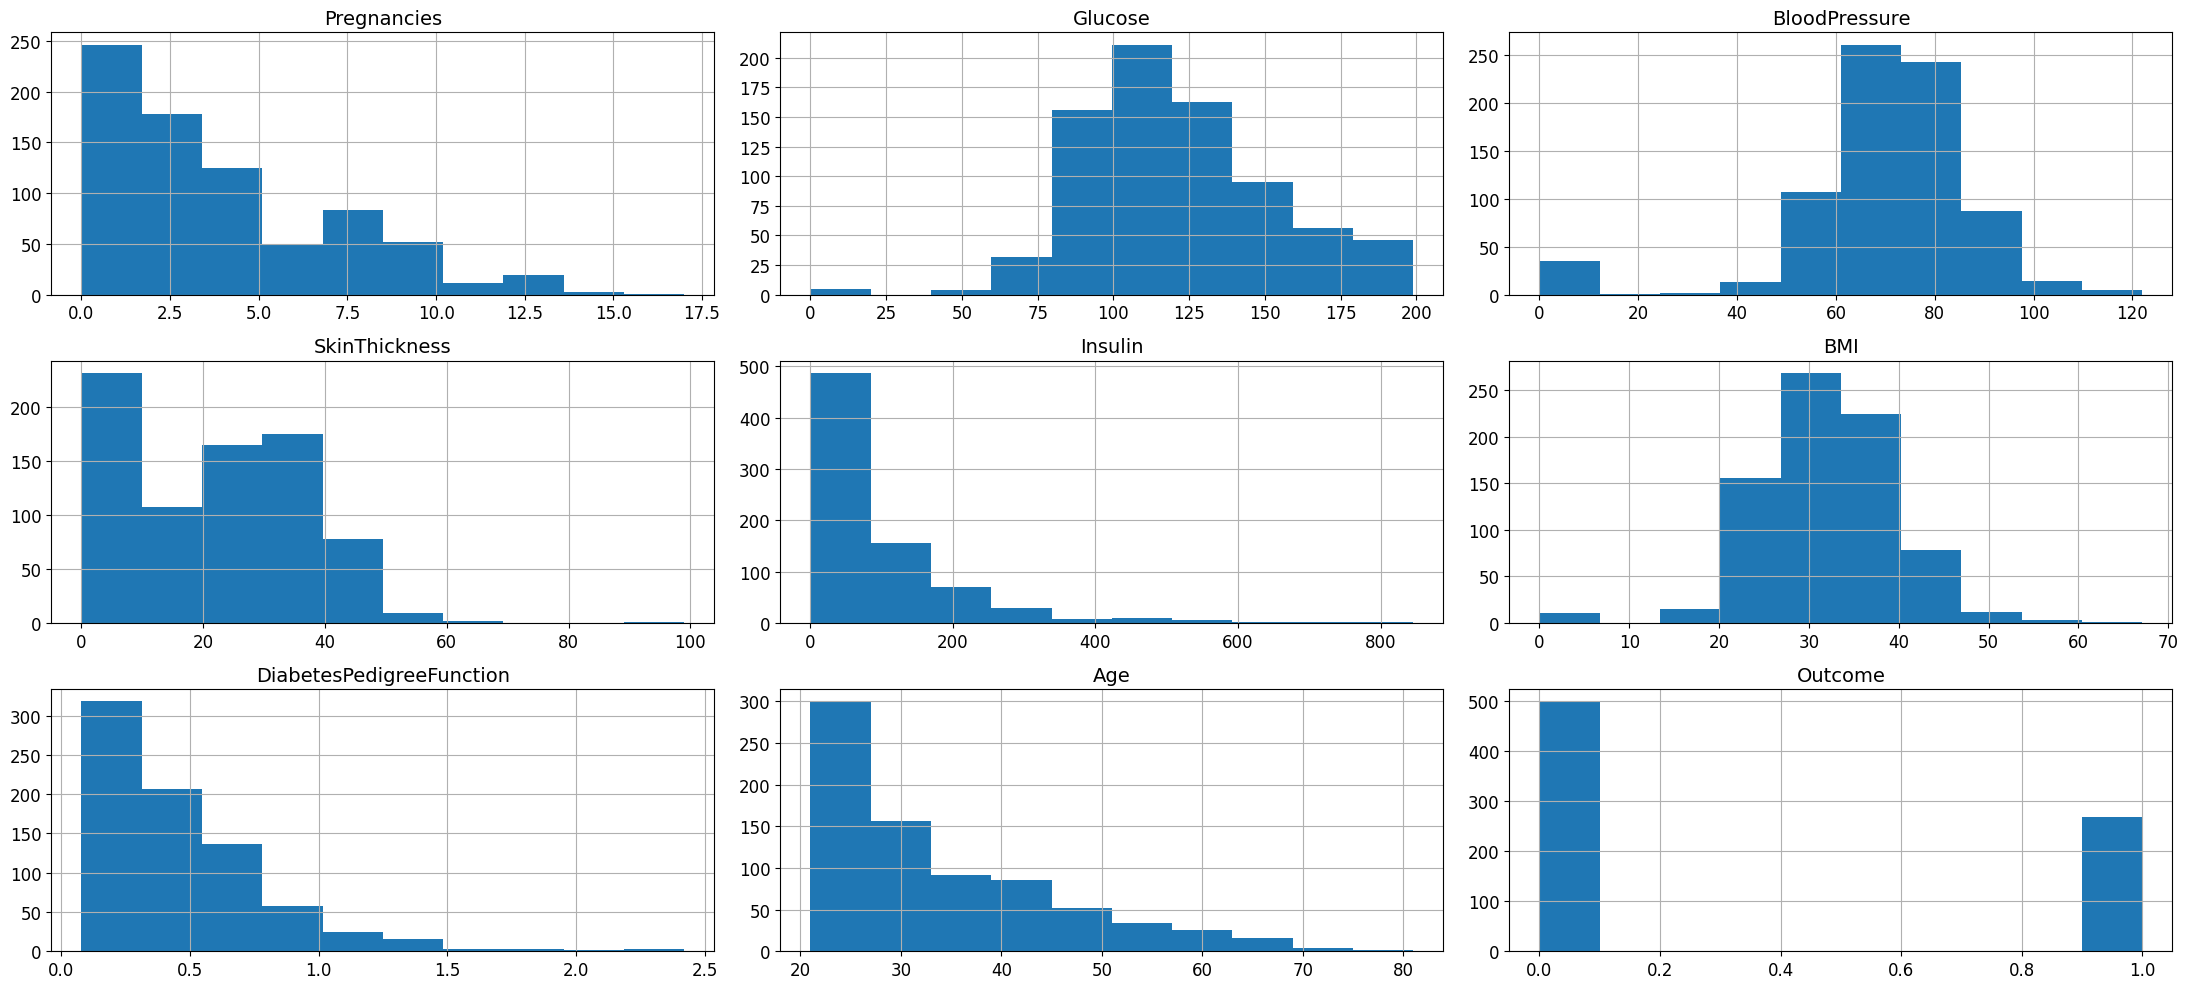

In [8]:
def display_dataset_distributions(dataset,bins=10,figsize=(22,10)):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12 ,figsize=figsize, bins=bins)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()
    
display_dataset_distributions(df)

Outcome
0    500
1    268
Name: count, dtype: int64


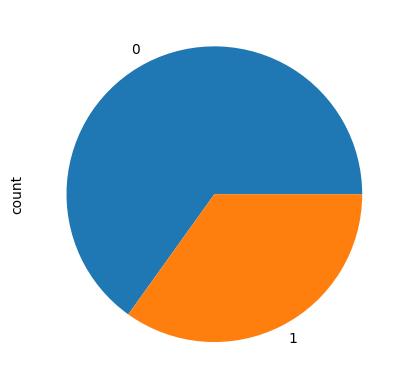

In [9]:
df.Outcome.value_counts().plot(kind ='pie')
print(df.Outcome.value_counts())

In [10]:
from sklearn.model_selection import train_test_split

df = df[df['Outcome'].notna()]

y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Outcome'], axis=1),
    y,
    test_size=0.15,
    random_state=0,
    stratify=y
    )

print("X_train.shape, X_test.shape = ")
print(X_train.shape, X_test.shape)

print("% of Outcome in original dataset: "+str((df['Outcome']==1).sum()/df.shape[0]*100))
print("% of Outcome in y_train: "+str((y_train==1).sum()/y_train.shape[0]*100))
print("% of Outcome in y_test: "+str((y_test==1).sum()/y_test.shape[0]*100))

X_train.shape, X_test.shape = 
(652, 8) (116, 8)
% of Outcome in original dataset: 34.89583333333333
% of Outcome in y_train: 34.96932515337423
% of Outcome in y_test: 34.48275862068966


In [12]:
# Join it to work easier
X_train['Outcome']=y_train
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
217,6,125,68,30,120,30.0,0.464,32,0
40,3,180,64,25,70,34.0,0.271,26,0
497,2,81,72,15,76,30.1,0.547,25,0
111,8,155,62,26,495,34.0,0.543,46,1
118,4,97,60,23,0,28.2,0.443,22,0
...,...,...,...,...,...,...,...,...,...
456,1,135,54,0,0,26.7,0.687,62,0
406,4,115,72,0,0,28.9,0.376,46,1
398,3,82,70,0,0,21.1,0.389,25,0
542,10,90,85,32,0,34.9,0.825,56,1


In [13]:
print('% of NaN in each column')
print(((1-df.count()/df.count().max())*100))

% of NaN in each column
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


C:\Users\cbureu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


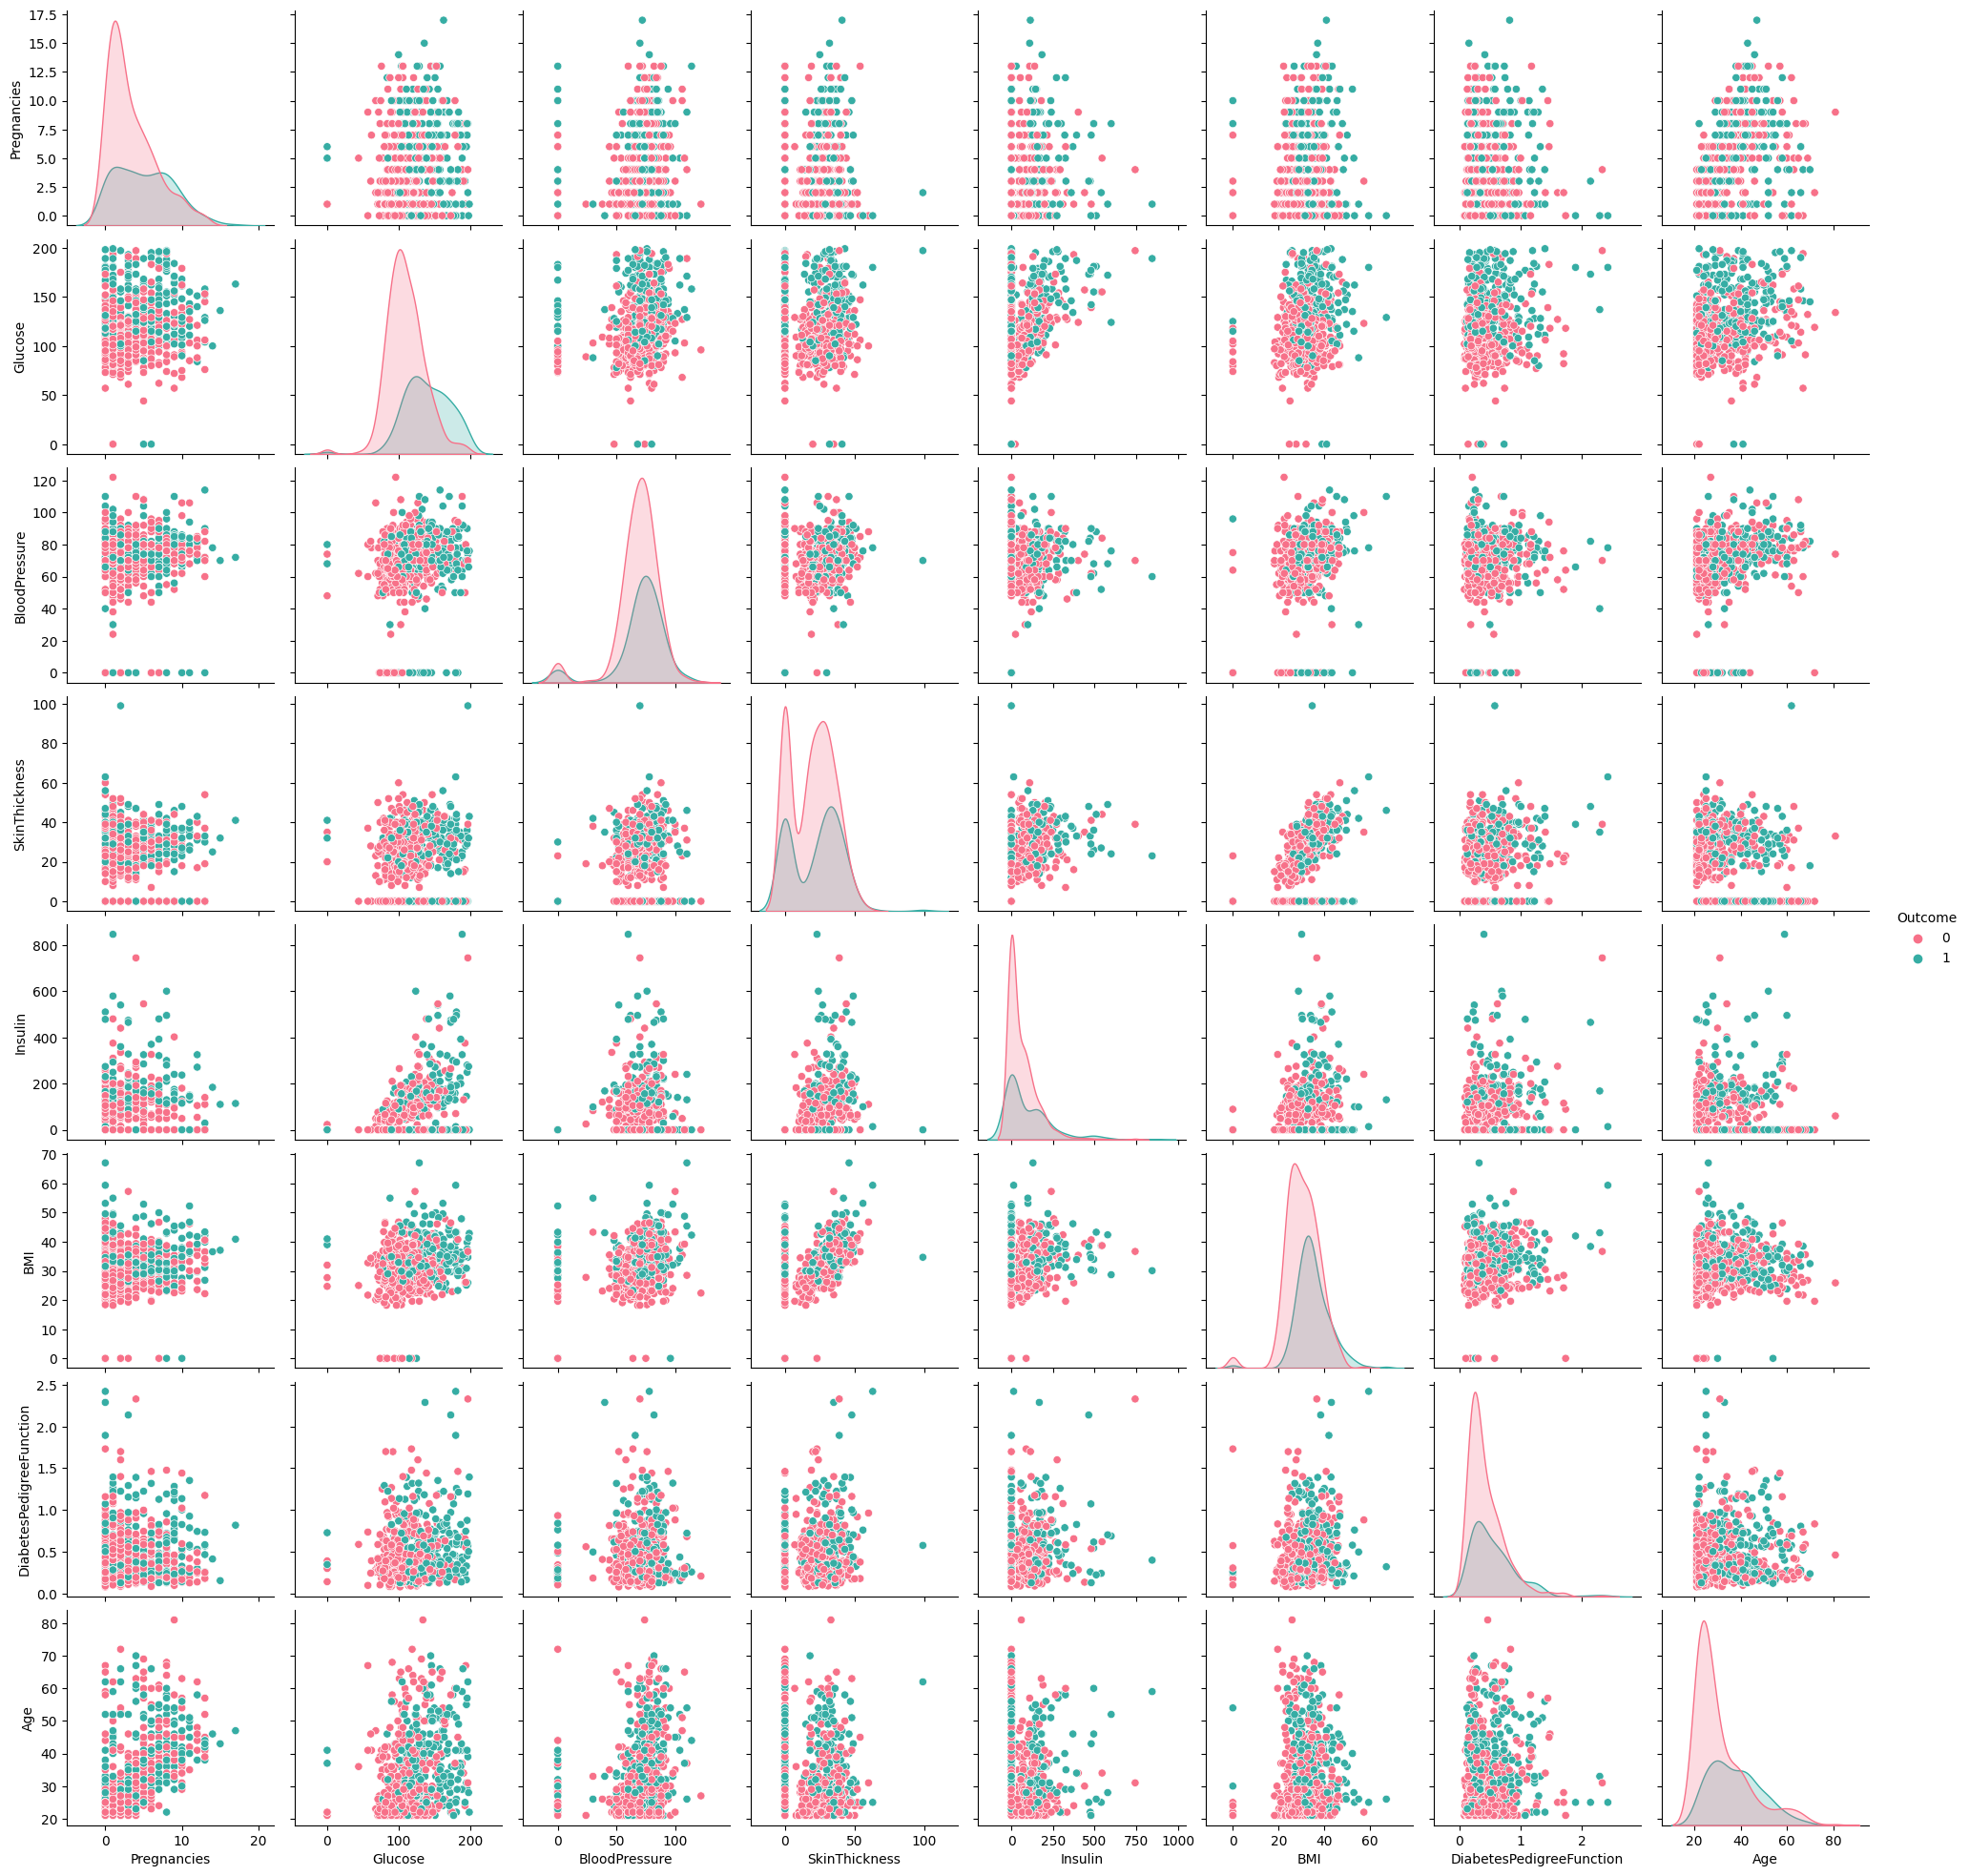

In [14]:
sns.pairplot(X_train,hue="Outcome",palette="husl")

## Outliers

In [16]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    # histograma
    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    # qqplot    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

    fig.suptitle(variable, fontsize=16)

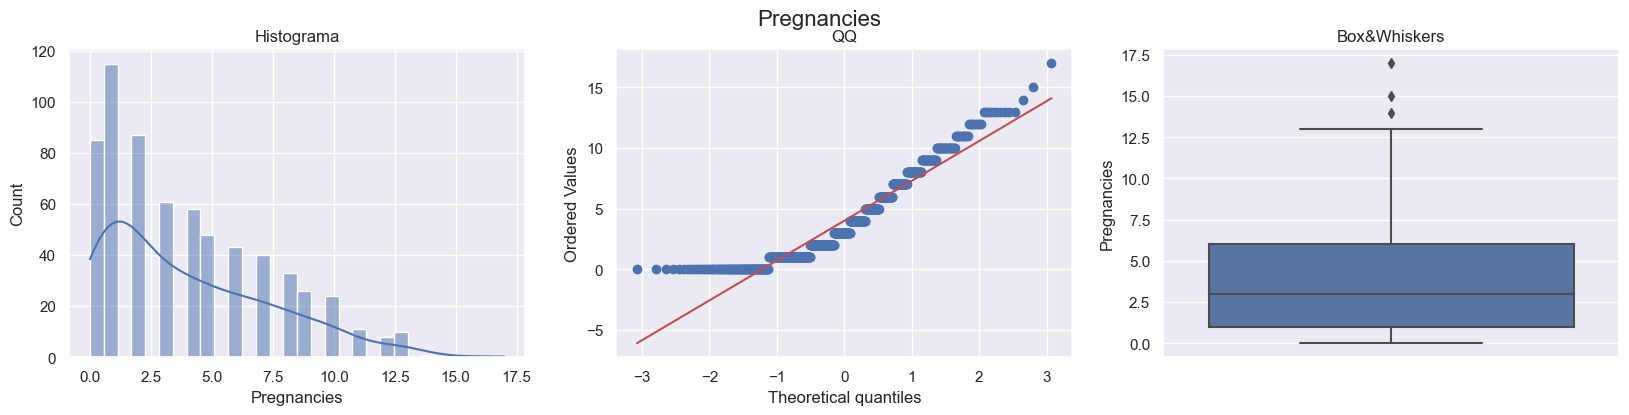

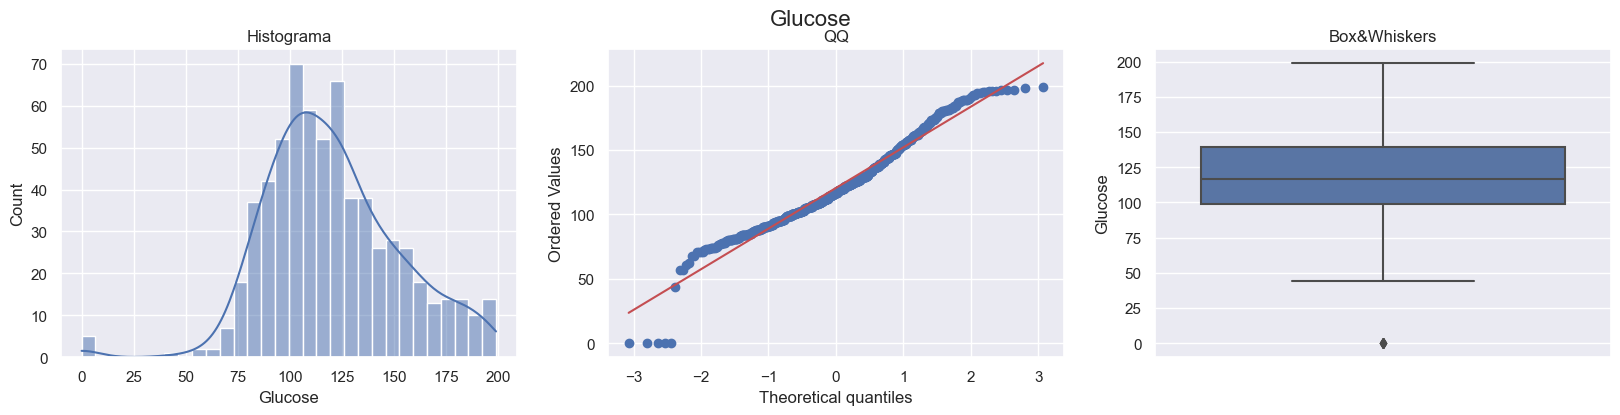

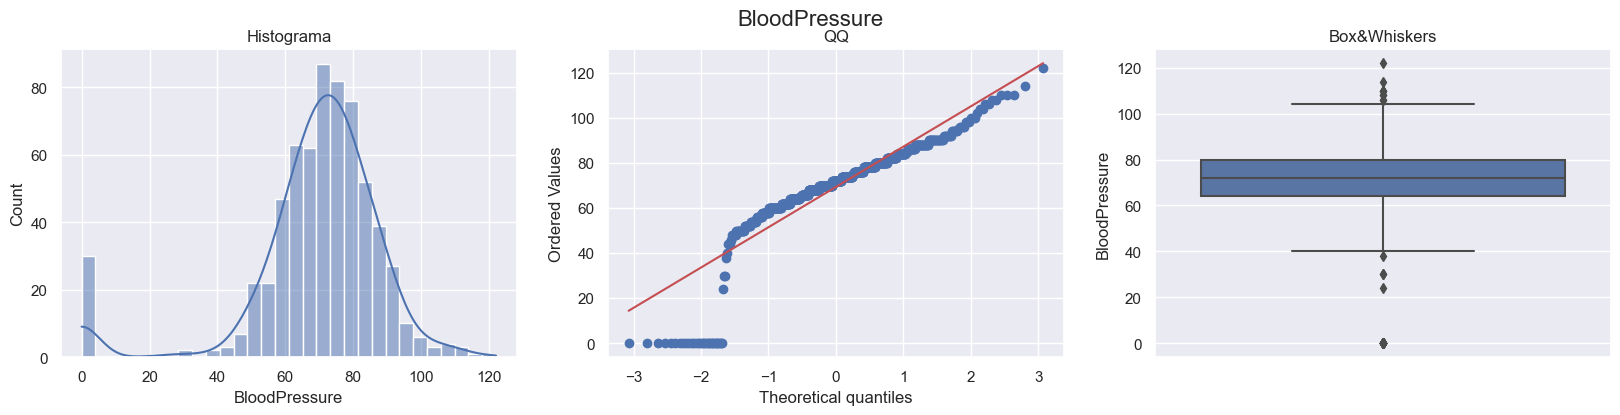

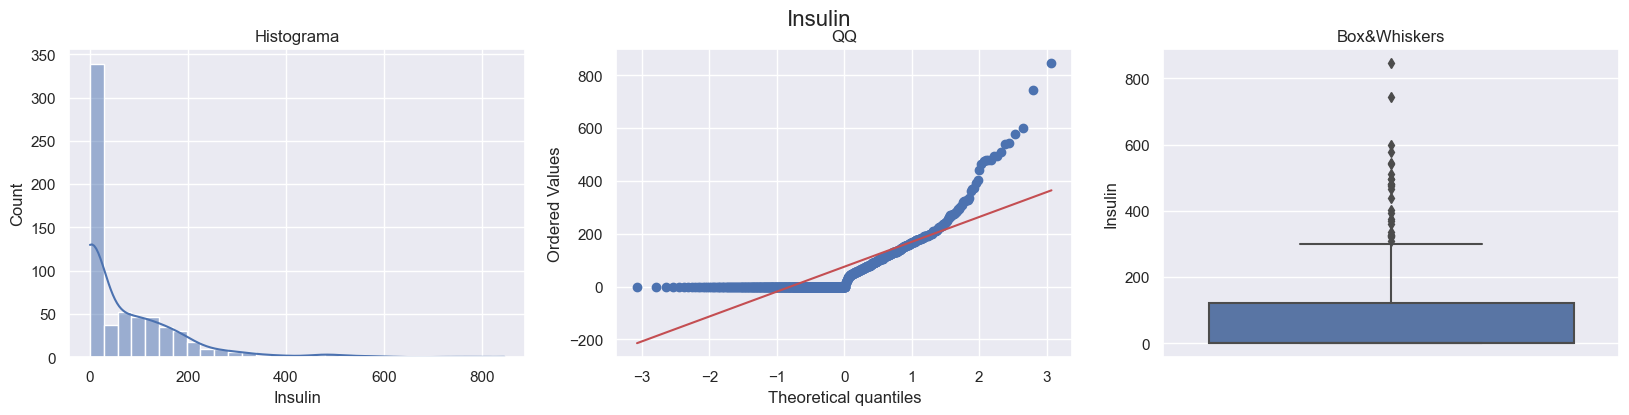

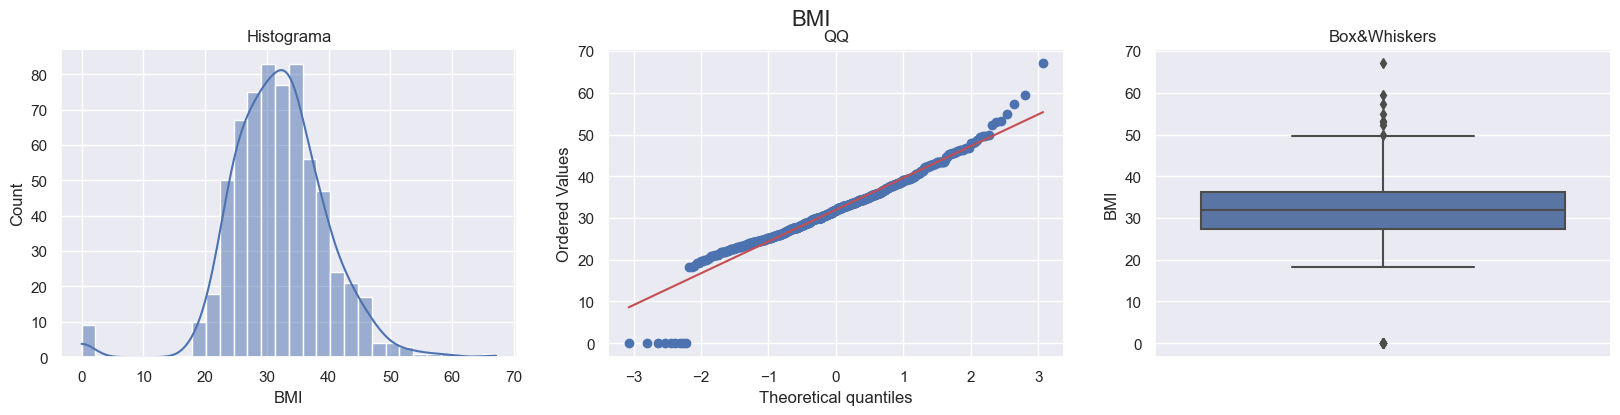

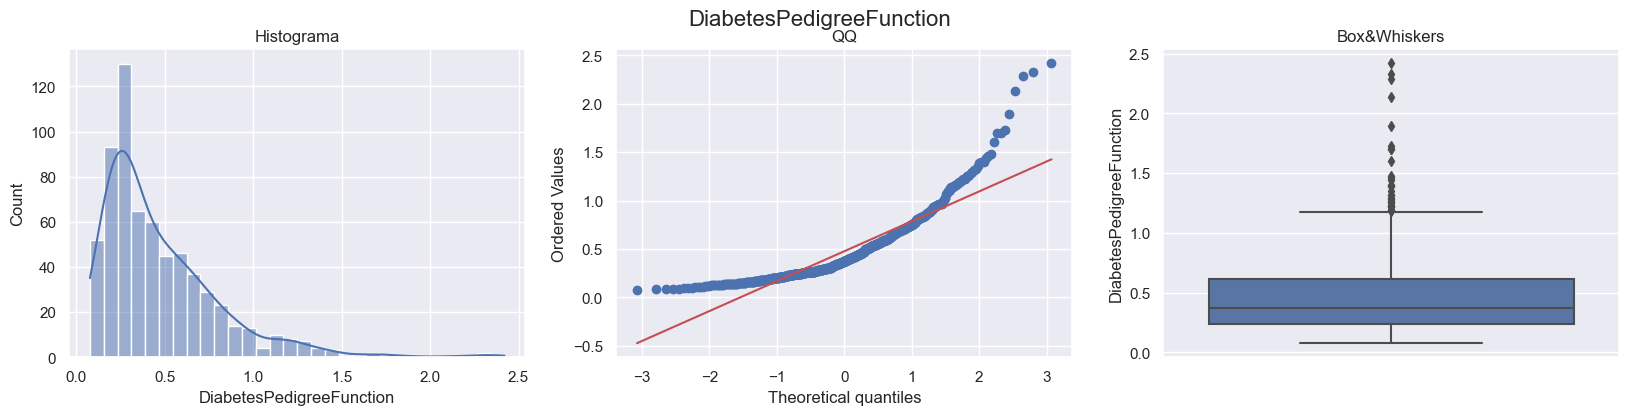

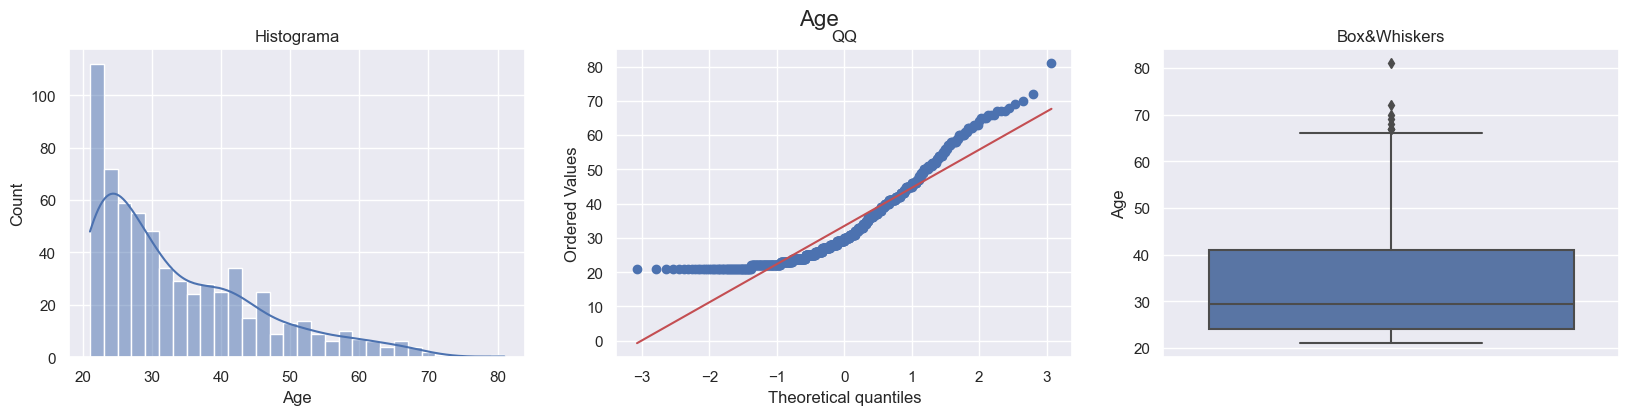

In [17]:
norm_col = [
    'Pregnancies',
    'Glucose', 
    'BloodPressure', 
    'Insulin', 
    'BMI',
    'DiabetesPedigreeFunction', 
    'Age'
]

for col in norm_col:
    outlier_diagnostic_plots(X_train, col)

In [18]:
def find_skewed_boundaries(df, variable, distance=1.5):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary
    
def transform_outliers(df, norm_col, threshold_capped=1.5, threshold_trimmed=1.8, use_manual_limits=False, 
                        upper_limit_trim=0, lower_limit_trim=0, upper_limit_cap=0, lower_limit_cap=0):
    # Trimming and capping outliers
    outliers_total = np.array(np.repeat(False,df.shape[0]))
    X_train_capped = df.copy()
    for col in norm_col:
        
        if use_manual_limits:
            upper_limit, lower_limit = upper_limit_trim, lower_limit_trim
        else:
            upper_limit, lower_limit = find_skewed_boundaries(df, col, threshold_trimmed)

        outliers = np.where(df[col] > upper_limit, True,
                            np.where(df[col] < lower_limit, True, False))                        
        outliers_total = np.logical_or(outliers_total, outliers)
        
        print(str(col) + " outliers = "+str(outliers.sum()))
        
        if use_manual_limits:
            upper_limit, lower_limit = upper_limit_cap, lower_limit_cap
        else:
            upper_limit, lower_limit = find_skewed_boundaries(df, col, threshold_capped)

        X_train_capped[col] = np.where(df[col] > upper_limit, upper_limit,
                            np.where(df[col] < lower_limit, lower_limit, X_train_capped[col]))

    print("Total outliers = "+str(outliers_total.sum()))
    X_train_trimmed = X_train_capped.loc[~(outliers_total)]

    return X_train_trimmed

Pregnancies outliers = 1
Glucose outliers = 5
BloodPressure outliers = 38
Insulin outliers = 20
BMI outliers = 15
DiabetesPedigreeFunction outliers = 19
Age outliers = 2
Total outliers = 87


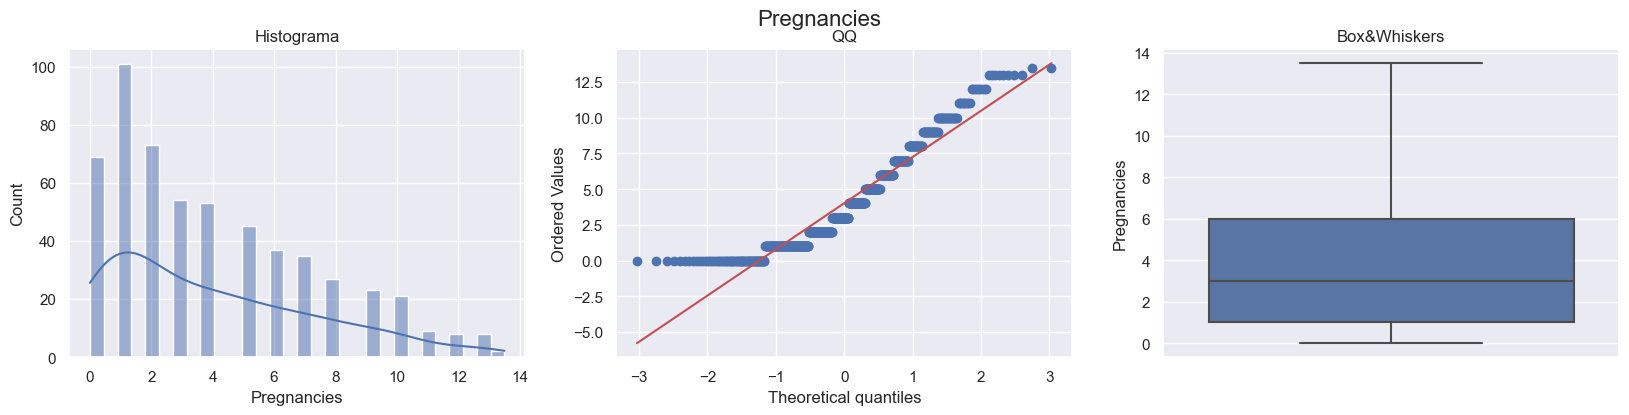

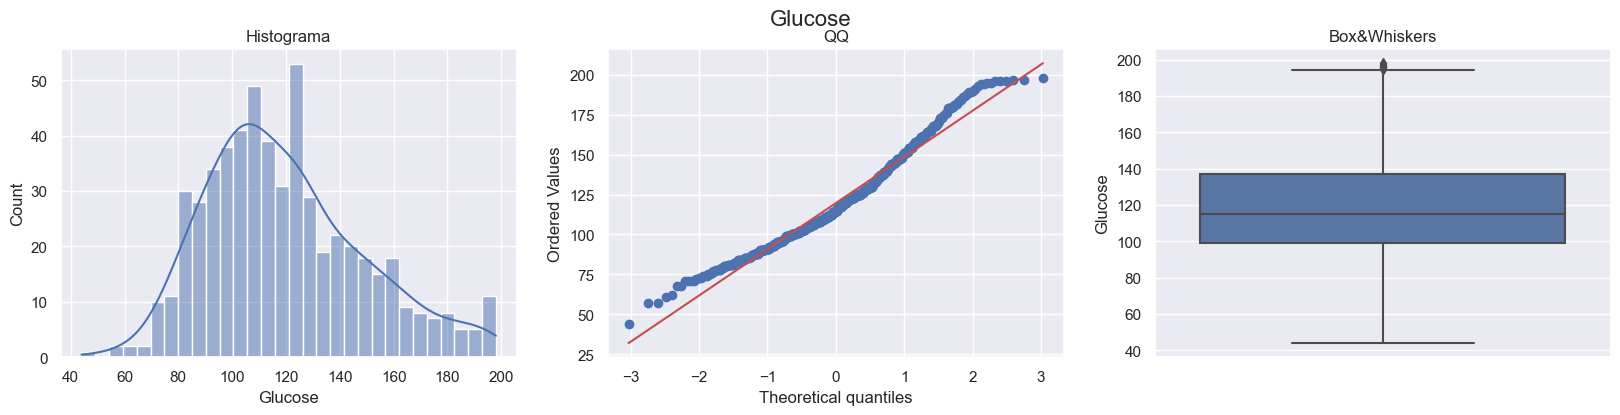

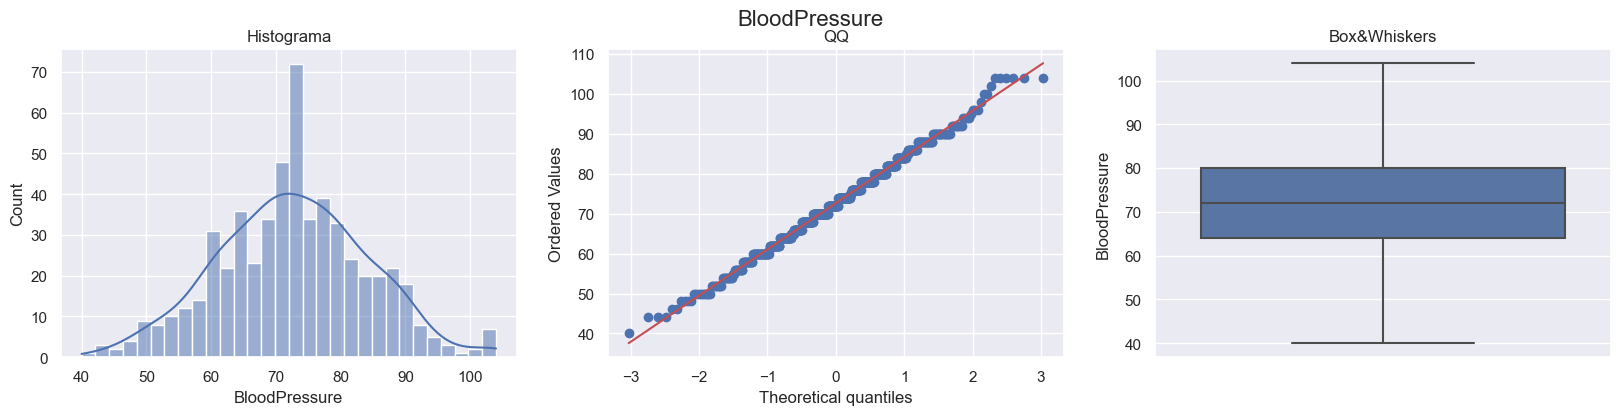

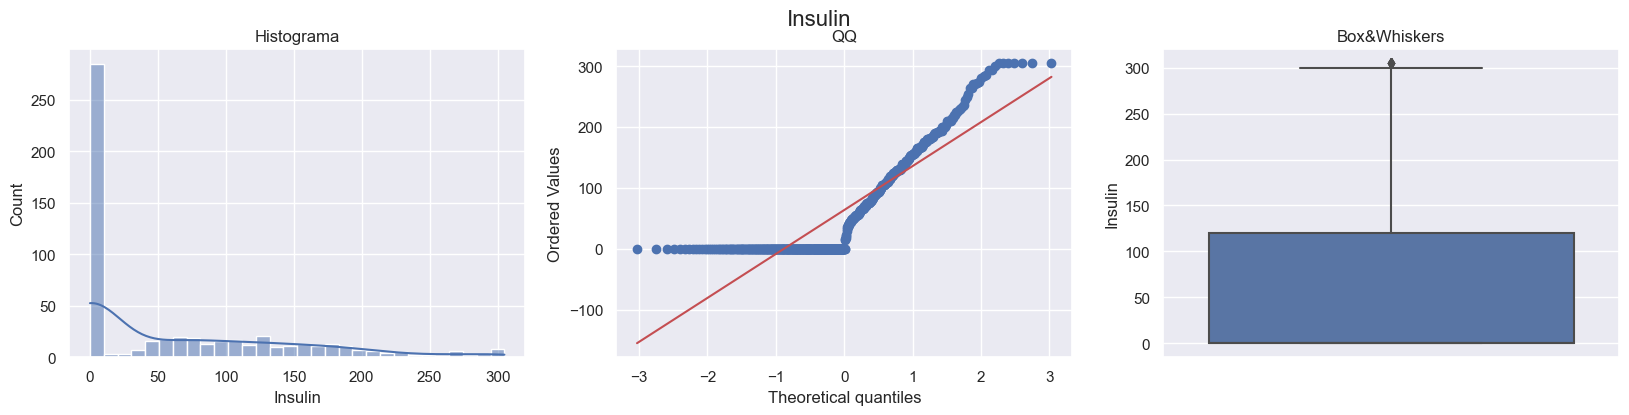

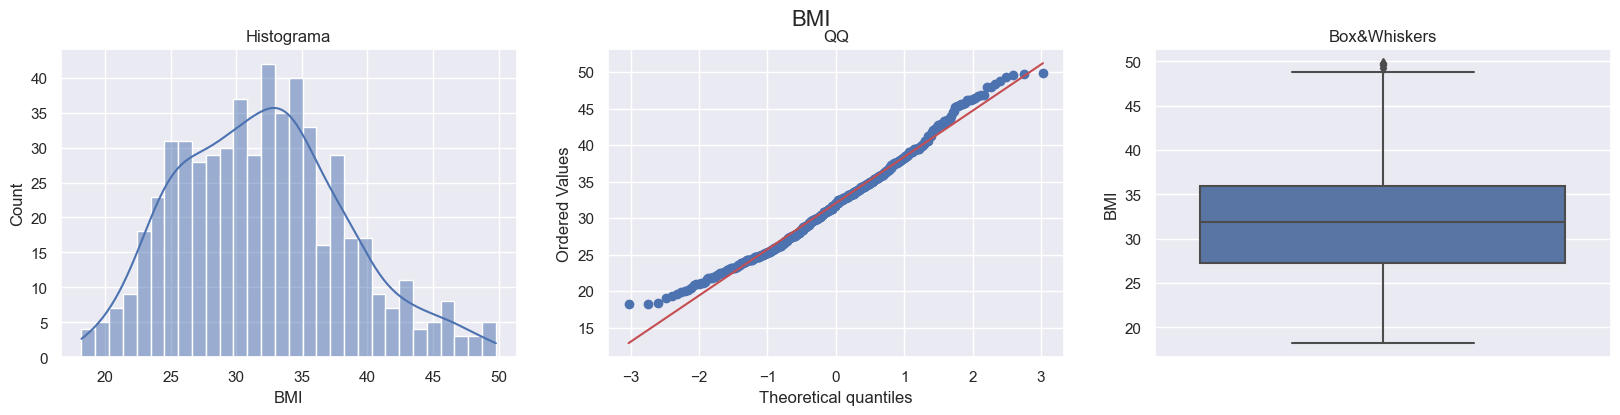

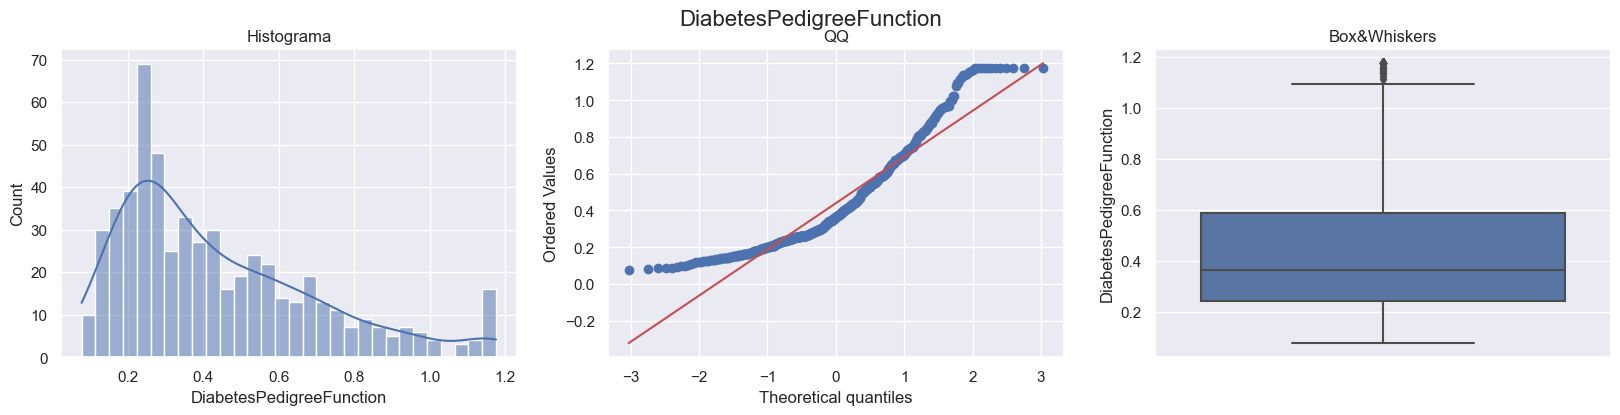

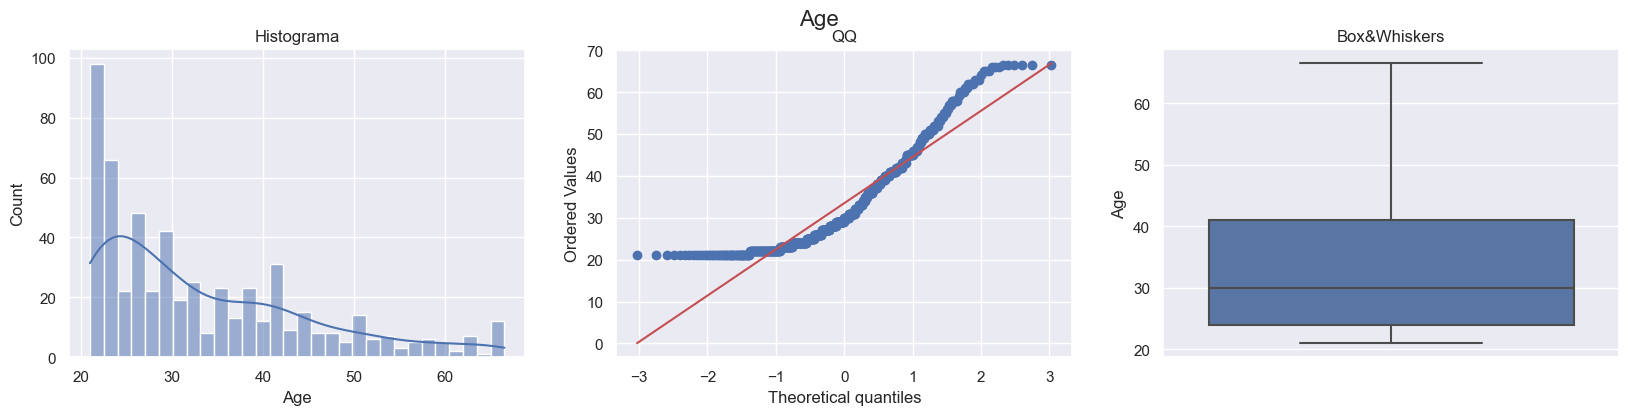

In [19]:
X_train_trimmed = transform_outliers(X_train, norm_col)

for col in norm_col:
    outlier_diagnostic_plots(X_train_trimmed, col)
    
X_train = X_train_trimmed

In [20]:
scaled_columns = [
    'Pregnancies',
    'Glucose', 
    'BloodPressure', 
    'Insulin', 
    'BMI',
    'DiabetesPedigreeFunction', 
    'Age'
]

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[scaled_columns] = scaler.fit_transform(X_train[scaled_columns])
X_train[scaled_columns].head(3)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
217,0.587417,0.183793,-0.400419,0.695403,-0.320519,0.092070,-0.127365
40,-0.303166,2.063770,-0.746877,0.075624,0.310303,-0.640531,-0.640760
497,-0.600027,-1.320188,-0.053962,0.149997,-0.304749,0.407126,-0.726326


<Axes: >

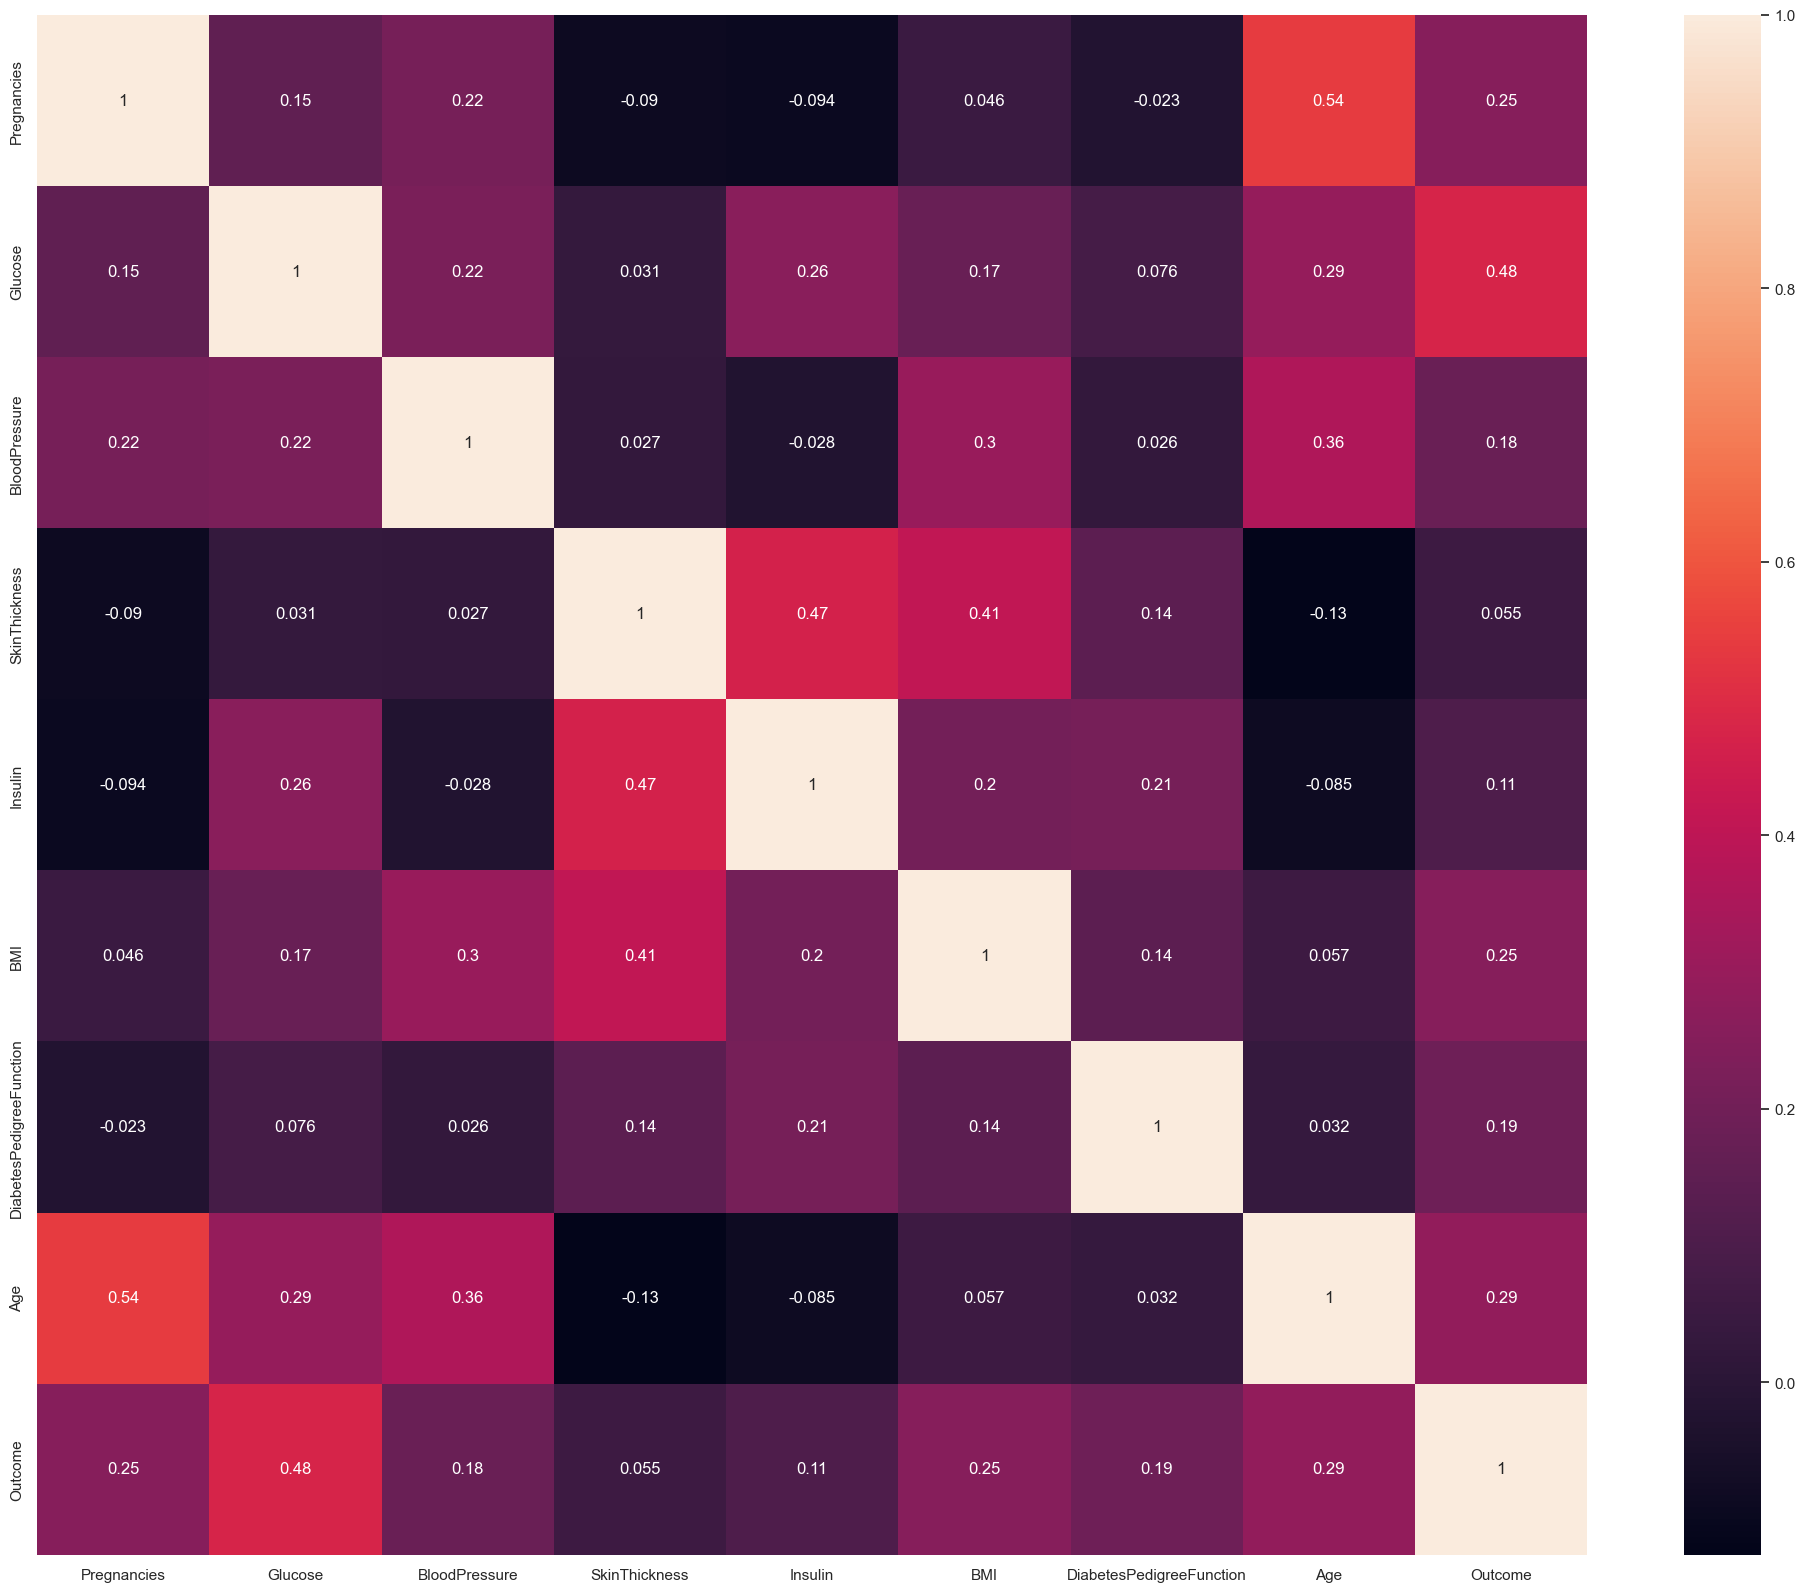

In [27]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(X_train.corr(), annot=True)